The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

https://www.cs.toronto.edu/~kriz/cifar.html

Klasifikasi Gambar berwarna dengan Data Set Cifar10

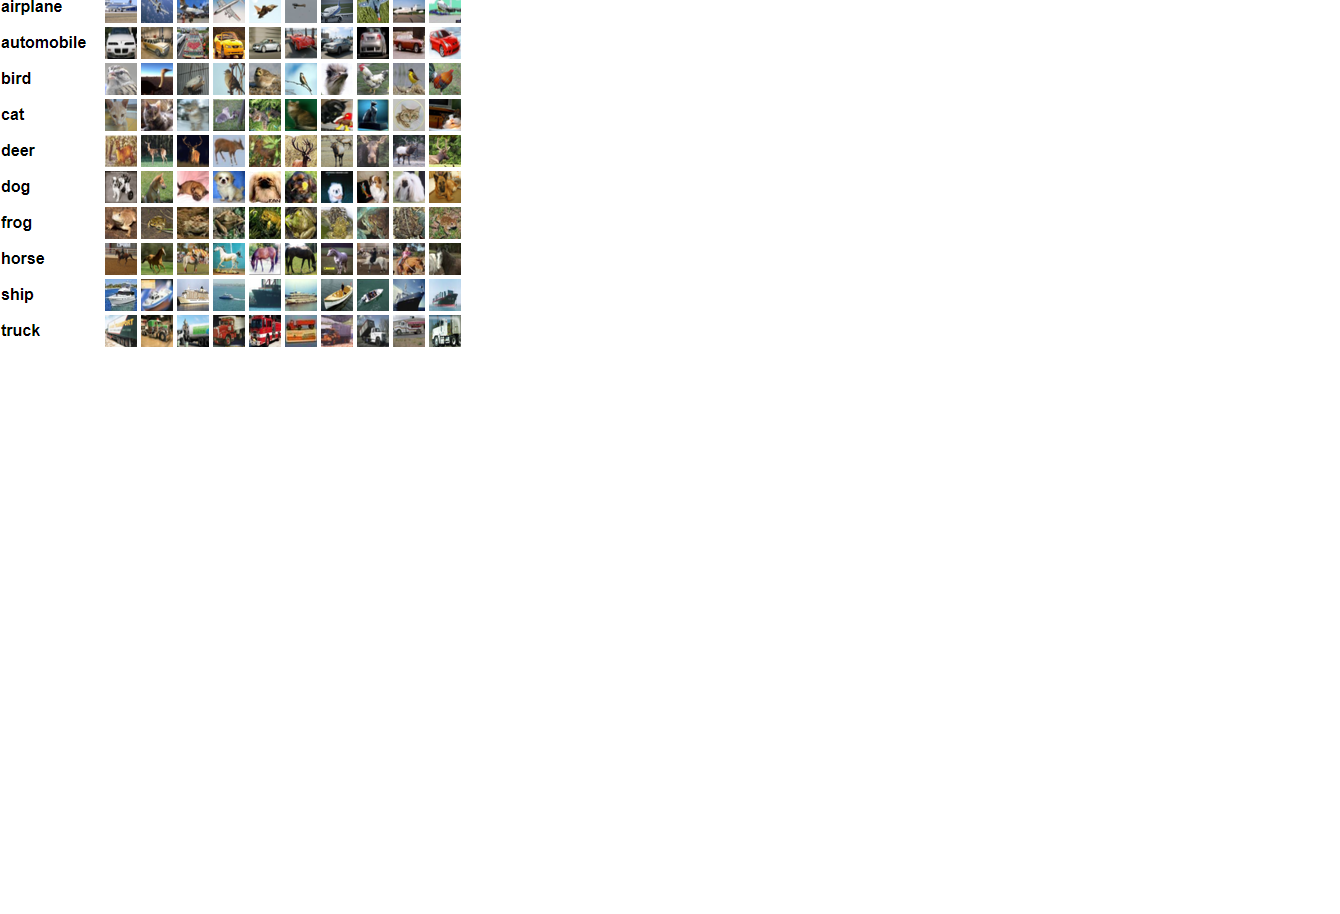


In [14]:
#import library yang diperlukan
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [9]:
# Mendapatkan dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

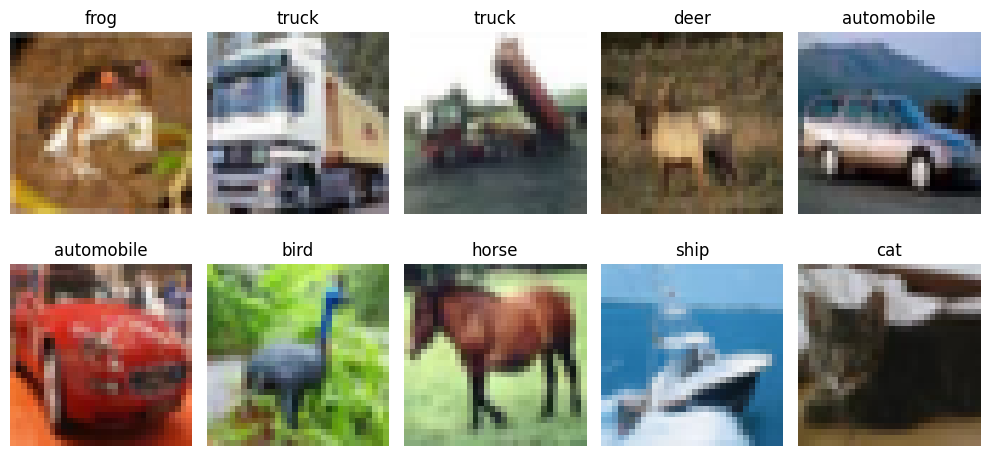

In [7]:
# Define a list of class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a subplot with 2 rows and 5 columns to display 10 images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')  # Turn off the axis labels

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

In [10]:
# Normalisasi data gambar
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [11]:
# Mengubah label menjadi one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
input_layer = Input(shape=(32, 32, 3))  # Input dengan shape (32, 32, 3)

# Mendefinisikan lapisan-lapisan berikutnya
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
maxpool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(maxpool1)
maxpool2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(64, (3, 3), activation='relu')(maxpool2)
flatten = Flatten()(conv3)
dense1 = Dense(64, activation='relu')(flatten)
output_layer = Dense(10, activation='softmax')(dense1)

# Membangun model
model = Model(inputs=input_layer, outputs=output_layer)

# Menampilkan summary model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928 

In [16]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Melatih model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 33s 52ms/step - loss: 1.6460 - accuracy: 0.3961 - val_loss: 1.3848 - val_accuracy: 0.5063
Epoch 2/10
625/625 [==============================] - 32s 52ms/step - loss: 1.2860 - accuracy: 0.5362 - val_loss: 1.2122 - val_accuracy: 0.5695
Epoch 3/10
625/625 [==============================] - 31s 49ms/step - loss: 1.1420 - accuracy: 0.5944 - val_loss: 1.1359 - val_accuracy: 0.5965
Epoch 4/10
625/625 [==============================] - 29s 47ms/step - loss: 1.0394 - accuracy: 0.6342 - val_loss: 1.0517 - val_accuracy: 0.6299
Epoch 5/10
625/625 [==============================] - 30s 47ms/step - loss: 0.9676 - accuracy: 0.6610 - val_loss: 0.9862 - val_accuracy: 0.6530
Epoch 6/10
625/625 [==============================] - 29s 46ms/step - loss: 0.9123 - accuracy: 0.6813 - val_loss: 1.0076 - val_accuracy: 0.6473
Epoch 7/10
625/625 [==============================] - 29s 47ms/step - loss: 0.8613 - accuracy: 0.6966 - val_loss: 0.9202 - val_accuracy:

In [18]:
# Evaluasi model pada data uji
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy on test data: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.9182 - accuracy: 0.6827
Accuracy on test data: 0.682699978351593


1/1 [==============================] - 0s 80ms/step


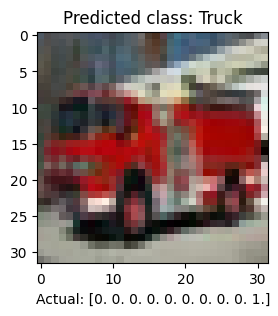

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Memilih satu gambar dari dataset uji
image_index = 23 # Ganti dengan indeks gambar yang ingin Anda prediksi
sample_image = test_images[image_index].reshape(1,32,32,3)

# Melakukan prediksi
predictions = model.predict(sample_image)
predicted_label = np.argmax(predictions)

cifar_10_labels = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Menampilkan gambar dan hasil prediksi
plt.figure(figsize=(3, 3))
plt.imshow(test_images[image_index]) #*, cmap=plt.cm.binary)
plt.xlabel("Actual: " + str(test_labels[image_index]))
plt.title(f'Predicted class: {cifar_10_labels[predicted_label]}')
plt.show()
